# Recommendation System

### Objective:
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 
Dataset:
Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

### Tasks:
1.Data Preprocessing:
Load the dataset into a suitable data structure (e.g., pandas DataFrame).
Handle missing values, if any.
Explore the dataset to understand its structure and attributes.

2.Feature Extraction:
Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
Convert categorical features into numerical representations if necessary.
Normalize numerical features if required.

3.Recommendation System:
Design a function to recommend anime based on cosine similarity.
Given a target anime, recommend a list of similar anime based on cosine similarity scores.
Experiment with different threshold values for similarity scores to adjust the recommendation list size.

4.Evaluation:
Split the dataset into training and testing sets.
Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
Analyze the performance of the recommendation system and identify areas of improvement.

### Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?
2. What is collaborative filtering, and how does it work?

### Tasks
1. Data Preprocessing: Load the dataset into a suitable data structure (e.g., pandas DataFrame). Handle missing values, if any. Explore the dataset to understand its structure and attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('anime.csv')
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
data.shape

(12294, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
# since genre,type and rating have null values we replace with value
data['genre'].fillna('Unknown', inplace=True)  
data['type'].fillna(data['type'].mode()[0], inplace=True)  
data['rating'].fillna(data['rating'].mean(), inplace=True)  

In [7]:
data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [8]:
data.describe()

,anime_id,rating,members
count,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.017096,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.900000,2.250000e+02
50%,10260.500000,6.550000,1.550000e+03
75%,24794.500000,7.170000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [9]:
data['type'].nunique()

6

In [10]:
data['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [11]:
data['type'].value_counts() 

TV         3812
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [12]:
# rating given frequently
data['rating'].value_counts()

6.473902    230
6.000000    141
7.000000     99
6.500000     90
6.250000     84
           ... 
3.470000      1
3.710000      1
3.870000      1
3.910000      1
3.140000      1
Name: rating, Length: 599, dtype: int64

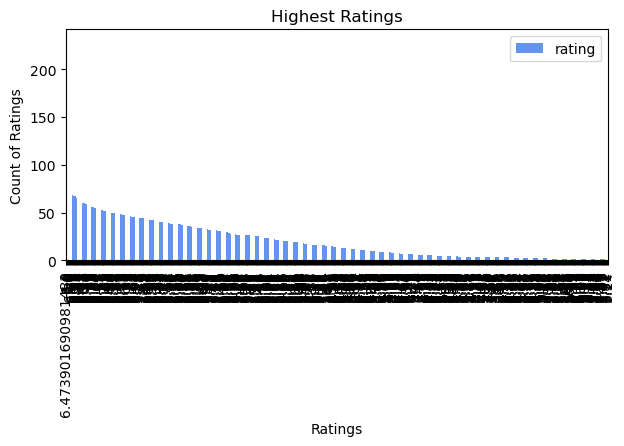

In [13]:
data['rating'].value_counts().plot(kind='bar', color='cornflowerblue', figsize=(7,3), 
                                     title='Highest Ratings', 
                                     xlabel='Ratings',
                                     ylabel= 'Count of Ratings',
                                     legend=True
                                    )
plt.show()

2.Feature Extraction: Decide on the features that will be used for computing similarity (e.g., genres, user ratings). Convert categorical features into numerical representations if necessary. Normalize numerical features if required.

In [14]:
#Feature selection 
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
#Convert Categorical Feature into Numerical 
data['genre'] = data['genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
# One-Hot Encoding for genres
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(data['genre']), columns=mlb.classes_)
data = pd.concat([data, genre_encoded], axis=1)
data.drop(columns=['genre'], inplace=True) 

In [15]:
# Normalize Numerical Features 
scaler = MinMaxScaler()
data[['rating', 'members']] = scaler.fit_transform(data[['rating', 'members']])
data.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,0.924370,0.197872,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,0.911164,0.782770,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,0.909964,0.112689,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,0.900360,0.664325,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9969,Gintama&#039;,TV,51,0.899160,0.149186,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
features = data.set_index('name').drop(columns=['anime_id', 'type', 'episodes'])
scaler = MinMaxScaler()
features[['rating', 'members']] = scaler.fit_transform(features[['rating', 'members']])
    

3.Recommendation System: Design a function to recommend anime based on cosine similarity. Given a target anime, recommend a list of similar anime based on cosine similarity scores. Experiment with different threshold values for similarity scores to adjust the recommendation list size.

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
# Item-Based Collaborative Filtering
def recommend_anime(target_anime, similarity_threshold=0.5):
    similarity_matrix = cosine_similarity(features)
    similarity_df = pd.DataFrame(similarity_matrix, index=features.index, columns=features.index)
    if target_anime in similarity_df.index:
        similar_animes = similarity_df[target_anime][similarity_df[target_anime] >= similarity_threshold].sort_values(ascending=False).drop(target_anime)
        return similar_animes
    else:
        return f"Anime '{target_anime}' not found in dataset."



In [18]:
target_anime = 'Steins;Gate'
similarity_threshold = 0.7  
top_recommendations = recommend_anime(target_anime, similarity_threshold)
print(top_recommendations)

name
Steins;Gate Movie: Fuka Ryouiki no Déjà vu                                                      0.965280
Steins;Gate: Oukoubakko no Poriomania                                                           0.959832
Steins;Gate: Kyoukaimenjou no Missing Link - Divide By Zero                                     0.936704
Steins;Gate 0                                                                                   0.928487
Under the Dog                                                                                   0.772375
Loups=Garous                                                                                    0.766948
Loups=Garous Pilot                                                                              0.754471
Final Fantasy: The Spirits Within                                                               0.746294
Sakasama no Patema: Beginning of the Day                                                        0.745569
Mai-Otome 0: S.ifr                                

4.Evaluation: Split the dataset into training and testing sets. Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score. Analyze the performance of the recommendation system and identify areas of improvement.

In [19]:
from sklearn.model_selection import train_test_split
# Evaluation
X = data.drop(columns=['rating', 'name', 'anime_id', 'type', 'episodes'])
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_bin = (y_pred > 0.7).astype(int)
y_test_bin = (y_test > 0.7).astype(int)

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test_bin, y_pred_bin)
recall = recall_score(y_test_bin, y_pred_bin)
f1 = f1_score(y_test_bin, y_pred_bin)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.752
Recall: 0.26857142857142857
F1-Score: 0.3957894736842105


###### Analyze the performance of the recommendation system and identify areas of improvement.
+ The recommendation system shows good precision (0.752) but has low recall (0.2686), meaning it misses many relevant anime. To improve, the recall can be increased by lowering the similarity threshold, exploring hybrid models, and fine-tuning feature selection. A more complex model or adjusting the recommendation approach could lead to better overall performance.

### Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?

+ User-based collaborative filtering recommends items by finding users with similar preferences and suggesting items they liked. Item-based collaborative filtering, on the other hand, recommends items that are similar to the ones a user has already liked or interacted with, based on item similarities. Both methods aim to predict a user's interest, but they differ in the focus of similarity—users versus items.

2. What is collaborative filtering, and how does it work?

+ Collaborative filtering is a recommendation technique that predicts a user's preferences based on the preferences of similar users or items. It works by identifying patterns in user behavior, such as ratings or interactions, and recommending items that similar users have liked (user-based) or finding items that are similar to what the user has already liked (item-based). The core idea is to leverage the collective knowledge of a community to make personalized recommendations.